In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [87]:
# 研究什么癌症
OncotreeCode = ['SCLC']

In [88]:
df_pathways_att = pd.read_csv('../../data/TransMCA_Pathway_Attention_MixedSet_GEP.csv')
df_pathways_att_single_drug = df_pathways_att
# 不做筛选
# df_pathways_att_single_drug = df_pathways_att[df_pathways_att['OncotreeCode'].isin(OncotreeCode)]
print(df_pathways_att_single_drug.shape)
df_pathways_att_single_drug.head()

(12485, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
0,AZD5582,22RV1,PRAD,0.001142,0.001531,0.001536,0.002483,0.001881,0.001143,0.001067,...,0.001535,0.001414,0.001535,0.001860,0.001967,0.001576,0.002505,0.001867,0.001791,0.001142
1,BMS-754807,22RV1,PRAD,0.001042,0.001583,0.001434,0.002456,0.001935,0.001051,0.000968,...,0.001519,0.001546,0.001519,0.002316,0.001939,0.001459,0.002187,0.001035,0.001525,0.001126
2,Cediranib,22RV1,PRAD,0.001039,0.001571,0.001432,0.001530,0.001805,0.001061,0.000973,...,0.001517,0.001546,0.001518,0.002087,0.001846,0.001462,0.002219,0.001116,0.001664,0.001124
3,Crizotinib,22RV1,PRAD,0.001037,0.001588,0.001430,0.001501,0.001786,0.001058,0.000966,...,0.001515,0.001544,0.001515,0.002086,0.001845,0.001529,0.002469,0.001179,0.001704,0.001122
4,Daporinad,22RV1,PRAD,0.001123,0.001644,0.001515,0.001817,0.001782,0.001098,0.000962,...,0.001515,0.001419,0.001516,0.002224,0.001928,0.001429,0.002816,0.001218,0.001845,0.001036


In [89]:
# 将df_pathways_att_oxaliplatin从第四列开始的数据取均值
df_pathways_single_drug_mean = df_pathways_att_single_drug.iloc[:, 3:].mean(axis=0)
df_pathways_single_drug_mean.head()

KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV            0.001092
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM            0.001762
KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY                      0.001470
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS                                    0.002211
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY    0.001908
dtype: float64

In [90]:
df_pathways_info_origin = pd.read_csv('../../data/c2.cp.kegg_medicus.v2023.2.Hs.symbols_info.csv')
df_pathways_info_origin.head()

,Unnamed: 0,pathway_name,pathway_id,pathway_type,pathway_class
0,0,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TR...,N01394,Env factor,Mitochondrial ROS formation
1,1,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP...,N01401,Env factor,CYP-mediated ROS formation
2,2,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALI...,N01352,Env factor,ERK signaling
3,3,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,N01386,Env factor,DNA adduct formation
4,4,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATE...,N01364,Env factor,Nuclear receptor signaling


In [91]:
# 将df_pathways_info_origin以pathway_class分组计数
df_pathways_info_origin.groupby('pathway_class').count()

,Unnamed: 0,pathway_name,pathway_id,pathway_type
pathway_class,,,,
AVP signaling,1,1,1,1
Acute myeloid leukemia,7,7,7,7
Alzheimer disease,22,22,22,22
Amyotrophic lateral sclerosis,14,14,14,14
Apoptosis,4,4,4,4
...,...,...,...,...
"Valine,leucine and isoleucine degradation",3,3,3,3
WNT signaling,8,8,8,8
beta-Oxidation in mitochondria,2,2,2,2


In [92]:
cancer_related_pathways1 = ['TGFB signaling','PI3K signaling','NOTCH signaling','MAPK signaling','WNT signaling','DNA adduct formation','Transcription']
cancer_related_pathways2 = ['TGFB signaling','PI3K signaling','NOTCH signaling','MAPK signaling','WNT signaling','DNA adduct formation','Transcription','JAK-STAT signaling','cAMP signaling']
df_pathways_info_origin['Cancer Related'] = np.where(df_pathways_info_origin['pathway_class'].isin(cancer_related_pathways2), True, False)

In [93]:
# 将df_pathways_single_drug_mean设置为dataframe
df_pathways_single_drug_mean = pd.DataFrame(df_pathways_single_drug_mean)
df_pathways_single_drug_mean.columns = ['attention']
df_pathways_single_drug_mean['pathway_name'] = df_pathways_single_drug_mean.index

In [94]:
df_pathways_single_drug_mean.reset_index(drop=True, inplace=True)
# 根据attention排序
df_pathways_single_drug_mean = df_pathways_single_drug_mean.sort_values(by='attention', ascending=False)
print(df_pathways_single_drug_mean.shape)
df_pathways_single_drug_mean.head()

(619, 2)


,attention,pathway_name
11,0.002963,KEGG_MEDICUS_ENV_FACTOR_NICOTINE_NNK_TO_CAMP_S...
161,0.002925,KEGG_MEDICUS_REFERENCE_CA2_CAM_VGCC_RYR_SIGNAL...
288,0.002920,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...
385,0.002903,KEGG_MEDICUS_REFERENCE_PROK_PRKR_GI_ERK_SIGNAL...
552,0.002900,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...


In [95]:
# 将df_pathways_single_drug_mean与df_pathways_info合并
df_pathways_single_drug_mean_merge = pd.merge(df_pathways_single_drug_mean, df_pathways_info_origin, on='pathway_name')
# 取attention,pathway_name,pathway_class,pathway_type
df_pathways_single_drug_mean_merge = df_pathways_single_drug_mean_merge[['attention','pathway_name','pathway_class','Cancer Related']]
print(df_pathways_single_drug_mean_merge.shape)
df_pathways_single_drug_mean_merge.head(1000)

(619, 4)


,attention,pathway_name,pathway_class,Cancer Related
0,0.002963,KEGG_MEDICUS_ENV_FACTOR_NICOTINE_NNK_TO_CAMP_S...,cAMP signaling,True
1,0.002925,KEGG_MEDICUS_REFERENCE_CA2_CAM_VGCC_RYR_SIGNAL...,Calcium signaling,False
2,0.002920,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,Cytoskeletal regulation (viruses and bacteria),False
3,0.002903,KEGG_MEDICUS_REFERENCE_PROK_PRKR_GI_ERK_SIGNAL...,Hypogonadotropic hypogonadism,False
4,0.002900,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...,Spinocerebellar ataxia,False
...,...,...,...,...
614,0.001080,KEGG_MEDICUS_PATHOGEN_KSHV_VCYCLIN_TO_CELL_CYC...,Cell cycle,False
615,0.001076,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_MET_TO...,Hepatocellular carcinoma,False
616,0.001068,KEGG_MEDICUS_ENV_FACTOR_ZN_TO_ANTEROGRADE_AXON...,Alzheimer disease,False
617,0.001066,KEGG_MEDICUS_REFERENCE_RETROGRADE_AXONAL_TRANS...,Parkinson disease,False


In [96]:
# 将df_pathways_single_drug_mean_merge从上到下，分成五份
df_pathways_single_drug_mean_merge['group'] = pd.qcut(df_pathways_single_drug_mean_merge.index, 5, labels=False)

In [97]:
# df_pathways_single_drug_mean_merge根据group列，统计每组中Cancer Related的数量，除以每组的总数
df_group_rate = df_pathways_single_drug_mean_merge.groupby('group')['Cancer Related'].mean()
df_group_rate.head()

group
0    0.298387
1    0.153226
2    0.073171
3    0.072581
4    0.080645
Name: Cancer Related, dtype: float64

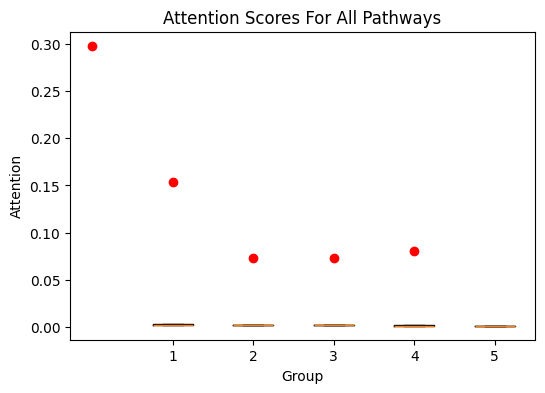

In [98]:
# 画df_pathways_single_drug_mean_merge的箱线图，group为x轴，attention为y轴，再将df_group_rate画在箱线图上
plt.figure(figsize=(6, 4))
plt.boxplot([df_pathways_single_drug_mean_merge[df_pathways_single_drug_mean_merge['group'] == 0]['attention'], df_pathways_single_drug_mean_merge[df_pathways_single_drug_mean_merge['group'] == 1]['attention'], df_pathways_single_drug_mean_merge[df_pathways_single_drug_mean_merge['group'] == 2]['attention'], df_pathways_single_drug_mean_merge[df_pathways_single_drug_mean_merge['group'] == 3]['attention'], df_pathways_single_drug_mean_merge[df_pathways_single_drug_mean_merge['group'] == 4]['attention']], showfliers=False)
plt.plot(df_group_rate.index, df_group_rate, 'ro')
plt.title('Attention Scores For All Pathways')
plt.xlabel('Group', fontsize=10)
plt.ylabel('Attention', fontsize=10)
plt.xticks([1, 2, 3, 4, 5], ['1', '2', '3', '4', '5'])
# ['0-20%', '20%-40%', '40%-60%', '60%-80%', '80%-100%']
plt.show()

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False

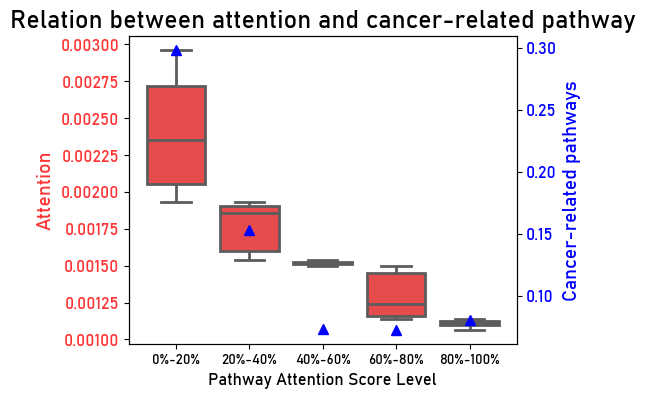

In [100]:
# 用seaborn画df_pathways_single_drug_mean_merge的箱线图，group为x轴，attention为y轴，再将df_group_rate画在箱线图上
plt.figure(figsize=(5, 4))
sns.boxplot(x='group', y='attention', data=df_pathways_single_drug_mean_merge, showfliers=False,color='#FF3333',linewidth=2)
plt.ylabel('Attention', fontsize=14,color = '#FF3333')
plt.yticks(color = '#FF3333',fontsize = 12)
plt.xlabel('Pathway Attention Score Level',fontsize = 12)

plt.twinx()
# plt.plot(df_group_rate.index, df_group_rate, 'ro')
plt.plot(df_group_rate.index, df_group_rate, 'b^', linewidth=2,markersize=7)
plt.title('Relation between attention and cancer-related pathway',fontsize = 18)
plt.yticks(color = 'b',fontsize = 12)

plt.ylabel('Cancer-related pathways', fontsize=14,color = 'b')
plt.xticks([0, 1, 2, 3, 4], ['0%-20%', '20%-40%', '40%-60%', '60%-80%', '80%-100%'],fontsize = 14)
plt.savefig('Relation between attention and cancer-related pathway', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
# 将df_pathways_single_drug_mean_merge前82个标记为红色，其余为蓝色
df_pathways_single_drug_mean_merge['color'] = np.where(df_pathways_single_drug_mean_merge.index < 100, 'r', 'b')
df_pathways_single_drug_mean_merge.head()

,attention,pathway_name,pathway_class,Cancer Related,group,color
0,0.002633,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,Cytoskeletal regulation (viruses and bacteria),False,0,r
1,0.002617,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...,Spinocerebellar ataxia,False,0,r
2,0.002611,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...,TGFB signaling,True,0,r
3,0.002610,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALIN...,PI3K signaling,True,0,r
4,0.002607,KEGG_MEDICUS_VARIANT_MLL_ENL_FUSION_TO_TRANSCR...,Transcription,True,0,r


中值: 0.0015200609271575614


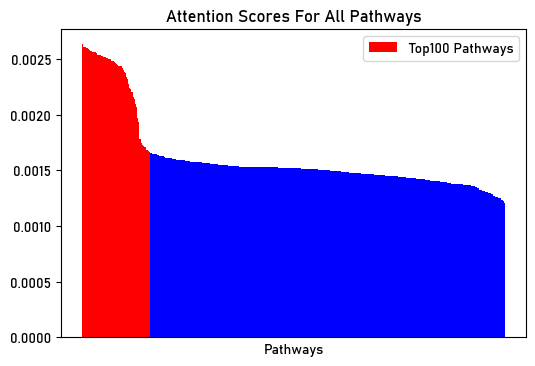

In [17]:
# 设置画布大小
plt.figure(figsize=(6, 4))
# 画出df_pathways_single_drug_mean的柱状图
plt.bar(df_pathways_single_drug_mean_merge['pathway_name'], df_pathways_single_drug_mean_merge['attention'], color=df_pathways_single_drug_mean_merge['color'],width=1)
# 在柱状图的中值上画一条竖线,在竖线上标注中值
# plt.vlines(309, 0, 0.0026, linestyles='dashed', colors='black', alpha=1)
# plt.text(309, 0.0026, 'Median', ha='center', va='bottom', fontsize=10)
# 在图中标注中值
# plt.text(309, 0.00262, 'Median: 0.001532', ha='center', va='bottom', fontsize=10)
# 画一个label：红色代表Target pathways
plt.bar([0], [0], color='r', label='Top100 Pathways')
# 将标签移到右下角
# 画一个label：蓝色代表Without Target pathways
# plt.bar([0], [0], color='b', label='Without Target pathways')
# 显示label
plt.legend()
# 打印出中值
print('中值:',df_pathways_single_drug_mean['attention'].median())
plt.title('Attention Scores For All Pathways')
plt.xticks([])
plt.xlabel('Pathways', fontsize=10)
# 保存图片
# plt.savefig('Attention Scores For All Pathways.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# 取df_pathways_single_drug_mean_merge前100个数据
df_pathways_top100 = df_pathways_single_drug_mean_merge.iloc[:123, :]
# 根据pathway_class分组，计算每组中的attention的均值
dfdf_pathways_top100_attention_score = df_pathways_top100.groupby('pathway_class')['attention'].mean()
dfdf_pathways_top100_attention_score.head(10)

pathway_class
AVP signaling                    0.002574
Acute myeloid leukemia           0.002034
Alzheimer disease                0.001967
Amyotrophic lateral sclerosis    0.002543
Apoptosis                        0.001635
Autophagy                        0.001629
CGAS-STING signaling             0.002579
CRH-ACTH-cortisol signaling      0.002477
CaSR-PTH signaling               0.001618
Calcium signaling                0.002211
Name: attention, dtype: float64

In [22]:
# 将df_pathways_single_drug_mean_merge的前84个数据，按照pathway_class分组计数
df_pathways_single_drug_mean_merge[df_pathways_single_drug_mean_merge.index < 123].groupby('pathway_class').count()

,attention,pathway_name,Cancer Related,group,color
pathway_class,,,,,
AVP signaling,1,1,1,1,1
Acute myeloid leukemia,2,2,2,2,2
Alzheimer disease,1,1,1,1,1
Amyotrophic lateral sclerosis,2,2,2,2,2
Apoptosis,1,1,1,1,1
Autophagy,1,1,1,1,1
CGAS-STING signaling,1,1,1,1,1
CRH-ACTH-cortisol signaling,3,3,3,3,3
CaSR-PTH signaling,1,1,1,1,1


In [99]:
# 将df_pathways_single_drug_mean_merge的前84个数据，按照pathway_class分组计数
df_counts = df_pathways_single_drug_mean_merge[df_pathways_single_drug_mean_merge.index < 100].groupby('pathway_class').count()
df_counts = df_counts.sort_values(by='attention', ascending=False)
# 取df_counts前两列
df_counts = df_counts.iloc[:, 0:1]
# 将第二列重命名为count
df_counts.columns = ['count']

# 将df_counts与df_pathways_top100_attention_score合并
df_counts = pd.merge(df_counts, dfdf_pathways_top100_attention_score, on='pathway_class')
df_counts

,count,attention
pathway_class,,
TGFB signaling,7,0.002277
Calcium signaling,6,0.002211
Transcription,5,0.002502
PI3K signaling,5,0.002234
NOTCH signaling,5,0.002411
Spinocerebellar ataxia,4,0.002439
KISS1-GnRH-LH/FSH-E2 signaling,4,0.002402
MAPK signaling,3,0.002233
Human cytomegalovirus (HCMV),3,0.002502


In [ ]:
#挑选出pathway_class = [TGFB signaling,PI3K signaling,NOTCH signaling,MAPK signaling,JAK-STAT signaling,Cytoskeletal regulation (viruses and bacteria),Nuclear receptor signaling,Necroptosis,TLR signaling,Calcium signaling,Transcription]
df_counts = df_counts[df_counts.index.isin(['TGFB signaling','PI3K signaling','NOTCH signaling','MAPK signaling','JAK-STAT signaling','Cytoskeletal regulation (viruses and bacteria)','Nuclear receptor signaling','Necroptosis','TLR signaling','Calcium signaling','Transcription'])]
# 将df_counts中pathway_class = Cytoskeletal regulation (viruses and bacteria),修改成Cytoskeletal regulation
df_counts = df_counts.rename(index={'Cytoskeletal regulation (viruses and bacteria)':'Cytoskeletal regulation'})

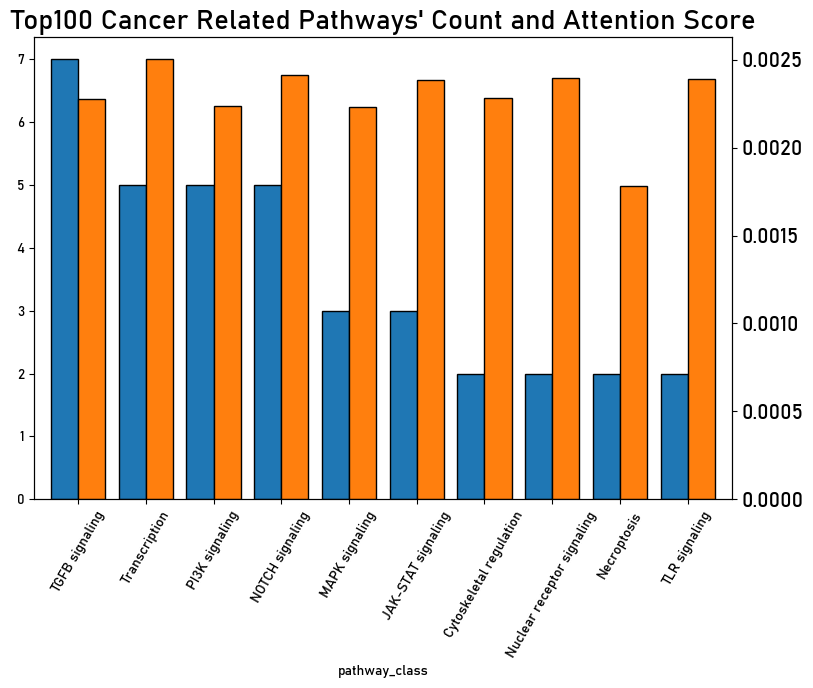

In [174]:
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 获取每个柱子的位置
x_positions = np.arange(len(df_counts))
# 画出df_counts的柱状图，每个pathway_class的count和attention
ax = df_counts.plot(kind='bar', secondary_y='attention', rot=60,figsize=(9, 6),legend=False,width=0.8, edgecolor='black')
# 找到最大值和最小值
# max_count = df_counts['count'].max()
# min_count = df_counts['count'].min()
# 
# max_attention = df_counts['attention'].max()
# min_attention = df_counts['attention'].min()

# 在柱状图顶部中间添加竖线
# for i, (count, attention) in enumerate(zip(df_counts['count'], df_counts['attention'])):
#     ax.plot([x_positions[i], x_positions[i]], [max_count, max_attention], color='k', linestyle='-', linewidth=0.5)
#     ax.plot([x_positions[i], x_positions[i]], [min_count, min_attention], color='k', linestyle='-', linewidth=0.5)
# 不显示label
plt.title('Top100 Cancer Related Pathways\' Count and Attention Score',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('Pathway Class', fontsize=15)
# 保存图片
plt.savefig('Top100 Cancer Related Pathways Count and Attention Score Distribution', dpi=300, bbox_inches='tight')
plt.show()

In [79]:
# 将df_counts的饼图画出，让count小于2的合并为others
df_counts['count'] = np.where(df_counts['count'] < 2, 'others', df_counts['count'])
df_counts

,count
pathway_class,
TGFB signaling,7
Calcium signaling,6
Transcription,5
PI3K signaling,5
NOTCH signaling,5
Spinocerebellar ataxia,4
KISS1-GnRH-LH/FSH-E2 signaling,4
MAPK signaling,3
Human cytomegalovirus (HCMV),3


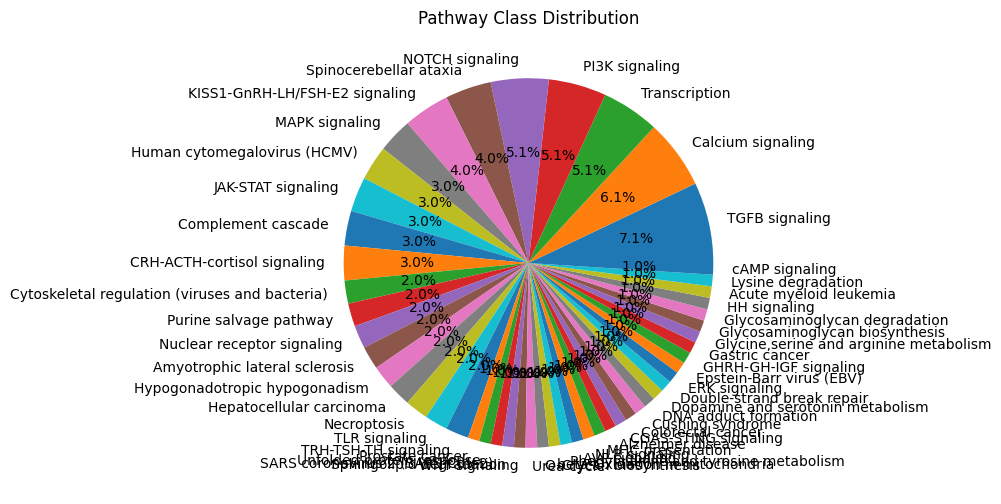

In [82]:
# 画出饼图
plt.figure(figsize=(6, 6))
plt.pie(df_counts['count'], labels=df_counts.index, autopct='%1.1f%%')
plt.title('Pathway Class Distribution')
# 保存图片
# plt.savefig('NSCLC_Pathway_Class_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [70]:
# 将df_pathways_single_drug_mean_merge的前84个数据，按照pathway_type分组计数
df_pathways_single_drug_mean_merge[df_pathways_single_drug_mean_merge.index < 84].groupby('pathway_type').count()

,attention,pathway_name,Unnamed: 0,pathway_id,pathway_class,color
pathway_type,,,,,,
Env factor,3,3,3,3,3,3
Pathogen,4,4,4,4,4,4
Reference,61,61,61,61,61,61
Variant,16,16,16,16,15,16
